In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Something about Bandit Problems
**Definitions**
- Bandit Problems
- Regret and other metrics
- Adversarial Bandit Problems

**Methods**
- Explore Only
- Exploit Only
- Epsilon-Greedy
- Upper Confidence Bound Algorithm

**TODO**
- Make charts of everything
- Tune parameters of mu and sigma to see how Regret converges as a function of time

**Goal:** Maximize value extracted within limited time and no given information

In [ ]:
# Review Latex and check out formulas for Regret and all that. It's probability stuff, so that's something else to learn

In [2]:
class Restaurant:
    def __init__(self, mu, dev):
        self.mu = mu
        self.dev = dev
    def sample(self):
        return np.random.normal(self.mu, self.dev)

Generate distribution by repeatedly calling the `some_restaurant.sample()` method.

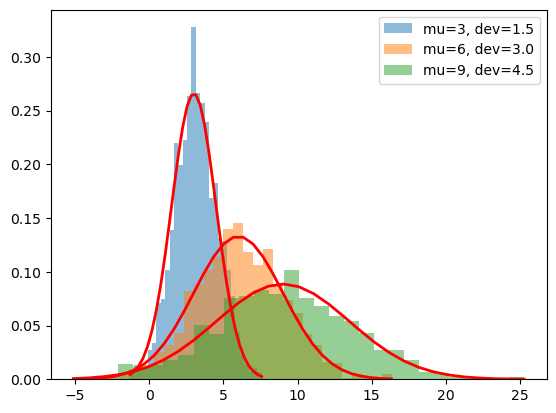

In [82]:
# Quick demonstration
dev_factor = 0.5
num_restaurants = 3

mu_vals = [3*i for i in range(1,num_restaurants+1)]
dev_vals = [mu*dev_factor for mu in mu_vals]
mu_dev_pairs = list(zip(mu_vals, dev_vals))

candidates = [Restaurant(mu,dev) for mu,dev in mu_dev_pairs]

# Distributions visualized
for c in candidates:
    dist = []
    for i in range(1000):
        dist.append(c.sample())
    count, bins, ignored = plt.hist(dist, 30, density=True, alpha=0.5, label=f"mu={c.mu}, dev={c.dev}")
    plt.plot(bins, 1/(c.dev * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - c.mu)**2 / (2 * c.dev**2) ),
             linewidth=2, color='r')
plt.legend(loc='upper right')
plt.show()

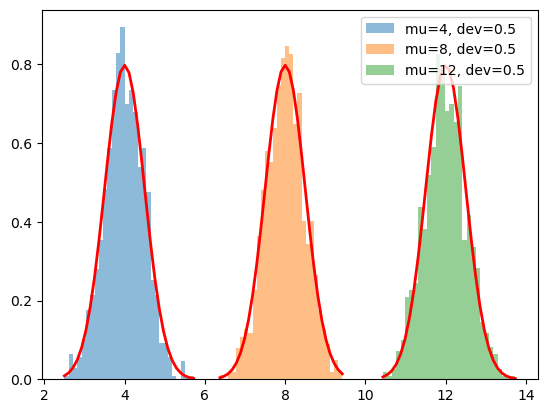

In [95]:
# Quick demonstration
num_restaurants = 3

mu_vals = [4*i for i in range(1,num_restaurants+1)]
dev_vals = [.5 for mu in mu_vals]
mu_dev_pairs = list(zip(mu_vals, dev_vals))

candidates = [Restaurant(mu,dev) for mu,dev in mu_dev_pairs]

# Distributions visualized
for c in candidates:
    dist = []
    for i in range(1000):
        dist.append(c.sample())
    count, bins, ignored = plt.hist(dist, 30, density=True, alpha=0.5, label=f"mu={c.mu}, dev={c.dev}")
    plt.plot(bins, 1/(c.dev * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - c.mu)**2 / (2 * c.dev**2) ),
             linewidth=2, color='r')
plt.legend(loc='upper right')
plt.show()

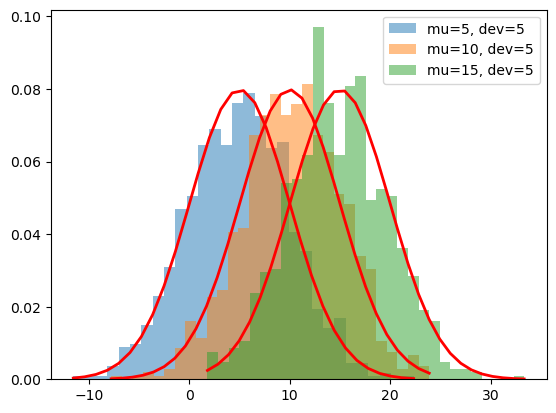

In [97]:
# Quick demonstration
num_restaurants = 3

mu_vals = [5*i for i in range(1,num_restaurants+1)]
dev_vals = [5 for mu in mu_vals]
mu_dev_pairs = list(zip(mu_vals, dev_vals))

candidates = [Restaurant(mu,dev) for mu,dev in mu_dev_pairs]

# Distributions visualized
for c in candidates:
    dist = []
    for i in range(1000):
        dist.append(c.sample())
    count, bins, ignored = plt.hist(dist, 30, density=True, alpha=0.5, label=f"mu={c.mu}, dev={c.dev}")
    plt.plot(bins, 1/(c.dev * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - c.mu)**2 / (2 * c.dev**2) ),
             linewidth=2, color='r')
plt.legend(loc='upper right')
plt.show()

In [86]:
def explore_only(candidates, num_days):
    scores = []
    for _ in range(num_days):
        scores.append(random.choice(candidates).sample())
    return sum(scores)

In [87]:
def exploit_only(candidates, num_days):
    scores = [c.sample() for c in candidates]
    chosen = candidates[np.argmax(scores)]
    for _ in range(num_days - len(candidates)):
        scores.append(chosen.sample())
    return sum(scores)

In [88]:
def epsilon_greedy(candidates, num_days, epsilon=0.05):
    scores = []
    history = {idx: [c.sample()] for idx,c in enumerate(candidates)}
    for _ in range(num_days - len(candidates)):
        p = np.random.random()
        #explore
        if p < epsilon:
            chosen = random.choice(candidates)
        #exploit
        else:
            chosen = candidates[sorted(history.items(), key=lambda pair: np.mean(pair[1]))[-1][0]]
        score = chosen.sample()
        scores.append(score)
        history[candidates.index(chosen)].append(score)
    return sum(scores)

### Remember to cross-reference with other sources to check that you have the right formulas. Might be wrong

- Note: According to Auer (https://link.springer.com/article/10.1023/A:1013689704352), UCB1 experiments are initialized by having each machine played at least once (avoid divide by zero error). Time on top is separate from time on bottom (one is overall timestep, the other is time played)

In [135]:
def ucb1(candidates, num_days):
    scores = []
    # Initialize with at least 1 trial for each candidate to avoid divide-by-zero error
    history = {idx: [c.sample()] for idx,c in enumerate(candidates)}
    
    # As you have to spend the first N days exploring each of the N candidates, the range is from N to num_days
    for t in range(len(candidates), num_days):
        # Upper Confidence Bounds calculated for each candidate
        mu_plus_ucb = [np.mean(history[idx]) + np.sqrt(2*np.log(t) / len(history[idx])) for idx in range(len(candidates))]
        # Pick the candidate with the highest potential, given by the highest UCB value
        chosen = candidates[np.argmax(mu_plus_ucb)]
        
        # Generate a sample with that chosen candidate and add that to the score and history arrays
        score = chosen.sample()
        scores.append(score)
        history[candidates.index(chosen)].append(score)

    return sum(scores)

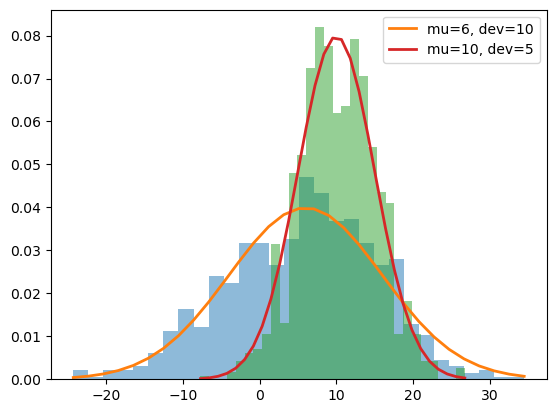

In [169]:
# Quick demonstration
mu_vals = [6, 10]
dev_vals = [10, 5]
mu_dev_pairs = list(zip(mu_vals, dev_vals))

candidates = [Restaurant(mu,dev) for mu,dev in mu_dev_pairs]

# Distributions visualized
for c in candidates:
    dist = []
    for i in range(1000):
        dist.append(c.sample())
    count, bins, ignored = plt.hist(dist, 30, density=True, alpha=0.5)
    plt.plot(bins, 1/(c.dev * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - c.mu)**2 / (2 * c.dev**2) ),
             linewidth=2, label=f"mu={c.mu}, dev={c.dev}")
plt.legend(loc='upper right')
plt.show()

In [147]:
import os
cwd = os.getcwd()  

In [155]:
# The following code is just the UCB code duplicated but rigged for a custom start for demonstration purposes.

num_days = 500
scores = []

# Initialize with at least 1 trial for each candidate to avoid divide-by-zero error
# We rig it such that the less optimal candidate begins with a higher start
history = {0: [8], 1: [4]}
for t in range(len(candidates), num_days):
    # UCB terms separated for ease of plotting
    mean = [np.mean(history[idx]) for idx in range(len(candidates))]
    ucb = [np.sqrt(2*np.log(t) / len(history[idx])) for idx in range(len(candidates))]
    
    # Upper Confidence Bounds calculated for each candidate
    mu_plus_ucb = [np.mean(history[idx]) + np.sqrt(2*np.log(t) / len(history[idx])) for idx in range(len(candidates))]
    # Pick the candidate with the highest potential, given by the highest UCB value
    chosen = candidates[np.argmax(mu_plus_ucb)]

    # Generate a sample with that chosen candidate and add that to the score and history arrays
    score = chosen.sample()
    scores.append(score)
    history[candidates.index(chosen)].append(score)

    ind = np.arange(len(candidates))
    width = 0.5
    p1 = plt.bar(ind, mean, width)
    p2 = plt.bar(ind, ucb, width,
                 bottom=mean)
    plt.ylabel('Scores')
    plt.title(f'UCB Values | Generation = {t+1}')
    plt.xticks(ind, ("mu = 6, dev = 10", "mu = 10, dev = 5"))
    plt.yticks(np.arange(0, 21, 4))
    
    p3 = plt.axhline(y=np.max(mu_plus_ucb), color='r', linestyle='--')
    
    for i in range(len(ind)):
        plt.text(i, 0.5*mean[i], round(mean[i],2), ha = 'center')
        plt.text(i, mean[i]+0.5*ucb[i], round(ucb[i],2), ha = 'center')
    
    plt.legend((p1[0], p2[0], p3), ('Means', 'UCBs', f"Current Highest Potential = {round(np.max(mu_plus_ucb),2)}"))

    plt.savefig(os.path.join(cwd, f"images\gen_{str(t+1).rjust(3, '0')}"))
    plt.close()

In [170]:
# The following code is just the UCB code duplicated but rigged for a custom start for demonstration purposes.

num_days = 50
scores = []

# Initialize with at least 1 trial for each candidate to avoid divide-by-zero error
# We rig it such that the less optimal candidate begins with a higher start
history = {0: [8], 1: [2]}
for t in range(len(candidates), num_days):
    # UCB terms separated for ease of plotting
    mean = [np.mean(history[idx]) for idx in range(len(candidates))]
    ucb = [np.sqrt(2*np.log(t) / len(history[idx])) for idx in range(len(candidates))]
    
    # Upper Confidence Bounds calculated for each candidate
    mu_plus_ucb = [np.mean(history[idx]) + np.sqrt(2*np.log(t) / len(history[idx])) for idx in range(len(candidates))]
    # Pick the candidate with the highest potential, given by the highest UCB value
    chosen = candidates[np.argmax(mu_plus_ucb)]

    # Generate a sample with that chosen candidate and add that to the score and history arrays
    score = chosen.sample()
    scores.append(score)
    history[candidates.index(chosen)].append(score)

    ind = np.arange(len(candidates))
    width = 0.5
    p1 = plt.bar(ind, mean, width)
    p2 = plt.bar(ind, ucb, width,
                 bottom=mean)
    plt.ylabel('Scores')
    plt.title(f'UCB Values (Bad Start) | Generation = {t+1}')
    plt.xticks(ind, ("mu = 6, dev = 10", "mu = 10, dev = 5"))
    plt.yticks(np.arange(0, 21, 4))
    
    p3 = plt.axhline(y=np.max(mu_plus_ucb), color='r', linestyle='--')
    
    for i in range(len(ind)):
        plt.text(i, 0.5*mean[i], round(mean[i],2), ha = 'center')
        plt.text(i, mean[i]+0.5*ucb[i], round(ucb[i],2), ha = 'center')
    
    plt.legend((p1[0], p2[0], p3), ('Means', 'UCBs', f"Current Highest Potential = {round(np.max(mu_plus_ucb),2)}"))

    plt.savefig(os.path.join(cwd, f"images\genbad_{str(t+1).rjust(3, '0')}"))
    plt.close()

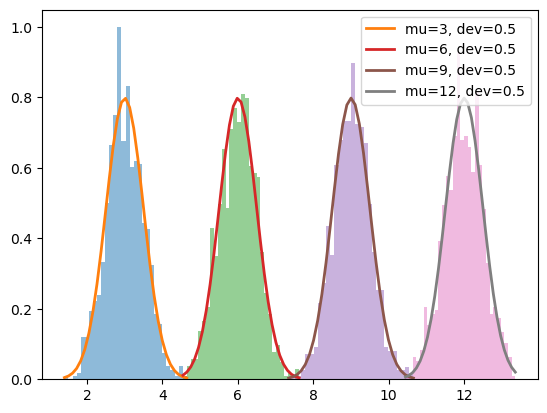

In [184]:
# Distanced distributions

dev_factor = 0.5
num_restaurants = 4

mu_vals = [3*i for i in range(1,num_restaurants+1)]
dev_vals = [dev_factor for mu in mu_vals]

mu_dev_pairs = list(zip(mu_vals, dev_vals))

candidates = [Restaurant(mu,dev) for mu,dev in mu_dev_pairs]

# Distributions visualized
for c in candidates:
    dist = []
    for i in range(1000):
        dist.append(c.sample())
    count, bins, ignored = plt.hist(dist, 30, density=True, alpha=0.5)
    plt.plot(bins, 1/(c.dev * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - c.mu)**2 / (2 * c.dev**2) ),
             linewidth=2, label=f"mu={c.mu}, dev={c.dev}")
plt.legend(loc='upper right')
plt.show()

In [185]:
# The following code is just the UCB code duplicated but rigged for a custom start for demonstration purposes.

num_days = 300
scores = []

# Initialize with at least 1 trial for each candidate to avoid divide-by-zero error
history = {idx: [c.sample()] for idx,c in enumerate(candidates)}
for t in range(len(candidates), num_days):
    # UCB terms separated for ease of plotting
    mean = [np.mean(history[idx]) for idx in range(len(candidates))]
    ucb = [np.sqrt(2*np.log(t) / len(history[idx])) for idx in range(len(candidates))]
    
    # Upper Confidence Bounds calculated for each candidate
    mu_plus_ucb = [np.mean(history[idx]) + np.sqrt(2*np.log(t) / len(history[idx])) for idx in range(len(candidates))]
    # Pick the candidate with the highest potential, given by the highest UCB value
    chosen = candidates[np.argmax(mu_plus_ucb)]

    # Generate a sample with that chosen candidate and add that to the score and history arrays
    score = chosen.sample()
    scores.append(score)
    history[candidates.index(chosen)].append(score)

    ind = np.arange(len(candidates))
    width = 0.5
    p1 = plt.bar(ind, mean, width)
    p2 = plt.bar(ind, ucb, width,
                 bottom=mean)
    plt.ylabel('Scores')
    plt.title(f'UCB Values (Distanced Distributions) | Generation = {t+1}')
    plt.xticks(ind, (f"mu = {c.mu} \n dev = {c.dev}" for c in candidates))
    plt.yticks(np.arange(0, 21, 4))
    
    p3 = plt.axhline(y=np.max(mu_plus_ucb), color='r', linestyle='--')
    
    for i in range(len(ind)):
        plt.text(i, 0.5*mean[i], round(mean[i],2), ha = 'center')
        plt.text(i, mean[i]+0.5*ucb[i], round(ucb[i],2), ha = 'center')
    
    plt.legend((p1[0], p2[0], p3), ('Means', 'UCBs', f"Current Highest Potential = {round(np.max(mu_plus_ucb),2)}"))

    plt.savefig(os.path.join(cwd, f"images\genfour_{str(t+1).rjust(3, '0')}"))
    plt.close()

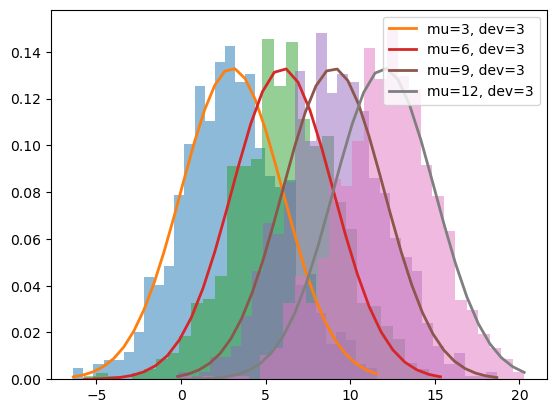

In [186]:
# Overlapping distributions

dev_factor = 3
num_restaurants = 4

mu_vals = [3*i for i in range(1,num_restaurants+1)]
dev_vals = [dev_factor for mu in mu_vals]

mu_dev_pairs = list(zip(mu_vals, dev_vals))

candidates = [Restaurant(mu,dev) for mu,dev in mu_dev_pairs]

# Distributions visualized
for c in candidates:
    dist = []
    for i in range(1000):
        dist.append(c.sample())
    count, bins, ignored = plt.hist(dist, 30, density=True, alpha=0.5)
    plt.plot(bins, 1/(c.dev * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - c.mu)**2 / (2 * c.dev**2) ),
             linewidth=2, label=f"mu={c.mu}, dev={c.dev}")
plt.legend(loc='upper right')
plt.show()

In [188]:
# The following code is just the UCB code duplicated but rigged for a custom start for demonstration purposes.

num_days = 300
scores = []

# Initialize with at least 1 trial for each candidate to avoid divide-by-zero error
history = {idx: [c.sample()] for idx,c in enumerate(candidates)}
for t in range(len(candidates), num_days):
    # UCB terms separated for ease of plotting
    mean = [np.mean(history[idx]) for idx in range(len(candidates))]
    ucb = [np.sqrt(2*np.log(t) / len(history[idx])) for idx in range(len(candidates))]
    
    # Upper Confidence Bounds calculated for each candidate
    mu_plus_ucb = [np.mean(history[idx]) + np.sqrt(2*np.log(t) / len(history[idx])) for idx in range(len(candidates))]
    # Pick the candidate with the highest potential, given by the highest UCB value
    chosen = candidates[np.argmax(mu_plus_ucb)]

    # Generate a sample with that chosen candidate and add that to the score and history arrays
    score = chosen.sample()
    scores.append(score)
    history[candidates.index(chosen)].append(score)

    ind = np.arange(len(candidates))
    width = 0.5
    p1 = plt.bar(ind, mean, width)
    p2 = plt.bar(ind, ucb, width,
                 bottom=mean)
    plt.ylabel('Scores')
    plt.title(f'UCB Values (Overlapping Distributions) | Generation = {t+1}')
    plt.xticks(ind, (f"mu = {c.mu} \n dev = {c.dev}" for c in candidates))
    plt.yticks(np.arange(0, 21, 4))
    
    p3 = plt.axhline(y=np.max(mu_plus_ucb), color='r', linestyle='--')
    
    for i in range(len(ind)):
        plt.text(i, 0.5*mean[i], round(mean[i],2), ha = 'center')
        plt.text(i, mean[i]+0.5*ucb[i], round(ucb[i],2), ha = 'center')
    
    plt.legend((p1[0], p2[0], p3), ('Means', 'UCBs', f"Current Highest Potential = {round(np.max(mu_plus_ucb),2)}"))

    plt.savefig(os.path.join(cwd, f"images\genfourstack_{str(t+1).rjust(3, '0')}"))
    plt.close()

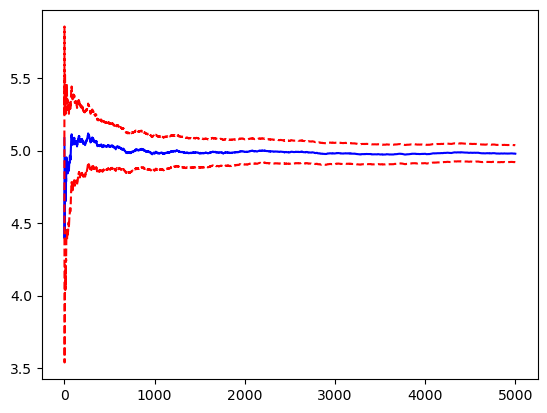

In [217]:
# The following code is just the UCB code duplicated but rigged for a custom start for demonstration purposes.

num_days = 5000

candidate = Restaurant(5,1)
scores = []
mus = []
muplus = []
muminus = []

# Initialize with at least 1 trial for each candidate to avoid divide-by-zero error
history = [candidate.sample()]
for t in range(1, num_days):
    # UCB terms separated for ease of plotting
    mean = np.mean(history)
    ucb = np.sqrt(2*np.log(t) / len(history))
    
    # Upper Confidence Bounds calculated for each candidate
    mu_plus_ucb = mean+ucb
    mu_minus_ucb = mean-ucb
    
    score = candidate.sample()
    
    mus.append(mean)
    history.append(score)
    muplus.append(mu_plus_ucb)
    muminus.append(mu_minus_ucb)

ind = range(1, num_days)

plt.plot(ind, mus, "b")
plt.plot(ind, muplus, "r--")
plt.plot(ind, muminus, "r--")
plt.show()

In [235]:
devs = [0.01, .5]
pops = [3, 10, 100]

In [247]:
df = pd.DataFrame(columns=[f"dev = {i} | n = {j}" for i in devs for j in pops], index=["Explore ONLY","Exploit ONLY","Epsilon-Greedy (10%)","UCB1"])
df

,dev = 0.01 | n = 3,dev = 0.01 | n = 10,dev = 0.01 | n = 100,dev = 0.5 | n = 3,dev = 0.5 | n = 10,dev = 0.5 | n = 100
Explore ONLY,NaN,NaN,NaN,NaN,NaN,NaN
Exploit ONLY,NaN,NaN,NaN,NaN,NaN,NaN
Epsilon-Greedy (10%),NaN,NaN,NaN,NaN,NaN,NaN
UCB1,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
num_days = 300
for i in devs:
    for j in pops:
        # For each condition, do 100 experiments per method
        
        # Initialize consistently for each experiment 
        mu_vals = [np.random.uniform() for _ in range(1,j+1)]
        dev_vals = [i for _ in mu_vals]
        mu_dev_pairs = list(zip(mu_vals, dev_vals))

        candidates = [Restaurant(mu,dev) for mu,dev in mu_dev_pairs]

        optimal_average = max(mu_vals)*num_days
        
        # Run each method
        explore_only_vals = []
        for _ in range(100):
            val = explore_only(candidates, num_days)
            explore_only_vals.append(val)
        df.loc["Explore ONLY", f"dev = {i} | n = {j}"] = (optimal_average - np.mean(explore_only_vals)) / optimal_average
              
        exploit_only_vals = []
        for _ in range(100):
            val = exploit_only(candidates, num_days)
            exploit_only_vals.append(val)
        df.loc["Exploit ONLY", f"dev = {i} | n = {j}"] = (optimal_average - np.mean(exploit_only_vals)) / optimal_average
              
        epsilon_greedy_vals = []
        for _ in range(100):
            val = epsilon_greedy(candidates, num_days, 0.1)
            epsilon_greedy_vals.append(val)
        df.loc["Epsilon-Greedy (10%)", f"dev = {i} | n = {j}"] = (optimal_average - np.mean(epsilon_greedy_vals)) / optimal_average
        
        ucb1_vals = []
        for _ in range(100):
            val = ucb1(candidates, num_days)
            ucb1_vals.append(val)
        df.loc["UCB1", f"dev = {i} | n = {j}"] = (optimal_average - np.mean(ucb1_vals)) / optimal_average

In [254]:
# 300 Generations
df

,dev = 0.01 | n = 3,dev = 0.01 | n = 10,dev = 0.01 | n = 100,dev = 0.5 | n = 3,dev = 0.5 | n = 10,dev = 0.5 | n = 100
Explore ONLY,0.090715,0.452201,0.510201,0.41722,0.484735,0.485382
Exploit ONLY,0.001008,0.015079,0.174164,0.14199,0.299403,0.278215
Epsilon-Greedy (10%),0.019053,0.076551,0.366709,0.069458,0.133017,0.434076
UCB1,0.071683,0.244146,0.595282,0.083533,0.289432,0.593909


In [255]:
num_days = 1000
for i in devs:
    for j in pops:
        # For each condition, do 100 experiments per method
        
        # Initialize consistently for each experiment 
        mu_vals = [np.random.uniform() for _ in range(1,j+1)]
        dev_vals = [i for _ in mu_vals]
        mu_dev_pairs = list(zip(mu_vals, dev_vals))

        candidates = [Restaurant(mu,dev) for mu,dev in mu_dev_pairs]

        optimal_average = max(mu_vals)*num_days
        
        # Run each method
        explore_only_vals = []
        for _ in range(100):
            val = explore_only(candidates, num_days)
            explore_only_vals.append(val)
        df.loc["Explore ONLY", f"dev = {i} | n = {j}"] = (optimal_average - np.mean(explore_only_vals)) / optimal_average
              
        exploit_only_vals = []
        for _ in range(100):
            val = exploit_only(candidates, num_days)
            exploit_only_vals.append(val)
        df.loc["Exploit ONLY", f"dev = {i} | n = {j}"] = (optimal_average - np.mean(exploit_only_vals)) / optimal_average
              
        epsilon_greedy_vals = []
        for _ in range(100):
            val = epsilon_greedy(candidates, num_days, 0.1)
            epsilon_greedy_vals.append(val)
        df.loc["Epsilon-Greedy (10%)", f"dev = {i} | n = {j}"] = (optimal_average - np.mean(epsilon_greedy_vals)) / optimal_average
        
        ucb1_vals = []
        for _ in range(100):
            val = ucb1(candidates, num_days)
            ucb1_vals.append(val)
        df.loc["UCB1", f"dev = {i} | n = {j}"] = (optimal_average - np.mean(ucb1_vals)) / optimal_average

In [256]:
# 1000 generations
df

,dev = 0.01 | n = 3,dev = 0.01 | n = 10,dev = 0.01 | n = 100,dev = 0.5 | n = 3,dev = 0.5 | n = 10,dev = 0.5 | n = 100
Explore ONLY,0.557094,0.539312,0.466858,0.483197,0.455103,0.52862
Exploit ONLY,0.001667,0.005659,0.04941,0.350568,0.28441,0.247709
Epsilon-Greedy (10%),0.059565,0.063756,0.142214,0.060789,0.073463,0.185577
UCB1,0.083151,0.127532,0.396553,0.100333,0.17538,0.446165
